<p align="center">
    <img src="https://github.com/jessepisel/energy_analytics/blob/master/EA_logo.jpg?raw=true" width="220" height="240" />

</p>

# Polynomial Regression

## Freshman Research Initiative Energy Analytics CS 309

#### Jesse Pisel, Assistant Professor of Practice, University of Texas at Austin
**[Twitter](http://twitter.com/geologyjesse)** | **[GitHub](https://github.com/jessepisel)** | **[GoogleScholar](https://scholar.google.com/citations?user=Z4JzYgIAAAAJ&hl=en&oi=ao)** | **[LinkedIn](https://www.linkedin.com/in/jesse-pisel-70519430/)**

Let's import `pandas` and `numpy` for data structures, and `seaborn` and `matplotlib` for viz

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
%matplotlib inline

Read in the data with `pandas` and plot up sonic (DT) and medium conductivity (AHTCO60) in a scatter plot

In [2]:
data = pd.read_csv(r'well_data.csv')

Let's create a subsample of the data so things run a bit faster using `pandas` `.sample()` method

In [3]:
data = data.sample(1000, random_state=86)

Text(0, 0.5, 'Medium Conductivity (AHTCO60)')

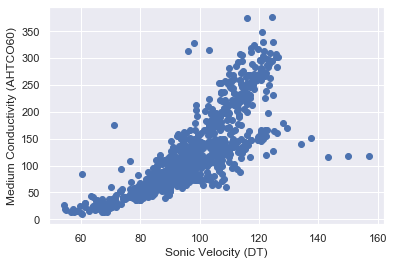

In [4]:
X = data.DT.values
y = data.AHTCO60.values
plt.scatter(X, y)
plt.xlabel('Sonic Velocity (DT)')
plt.ylabel('Medium Conductivity (AHTCO60)')

We are going to do a support vector regression. To do this we need to import `SVR` from `sklearn`. We are going to use the polynomial kernel of degree 4 with gamma set to scale. As with all the `sklearn` classes, we need to first `fit` the regressor before we can make predictions with it

In [5]:
from sklearn.svm import SVR

In [6]:
svr = SVR(kernel='poly', degree=4, gamma='scale')
svr.fit(X.reshape(-1,1), y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=4, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Now let's wrap our predictions into our plot and plot up our dataset along with the regression

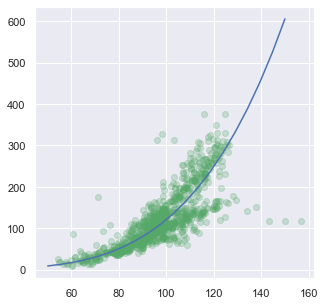

In [7]:
xp = np.linspace(50,150,20)

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.scatter(X, y, label='Observed', color='g', alpha=0.25)
ax.plot(xp, svr.predict(xp.reshape(-1,1)))

we can also get the R-squared value just like in linear regression

In [8]:
svr.score(X.reshape(-1,1),y)

0.50240259778964